In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
tspa_raw_df = pd.read_csv("../../raw_data/TSPA.csv",  header=None)
tspb_raw_df = pd.read_csv("../../raw_data/TSPB.csv",  header=None)

# Instance A

In [3]:
experiment_summary_a_local_search = pd.read_csv("../Results/LocalSearch/TSPA/experiment_summary.csv")


In [4]:
experiment_summary_a_local_search


Instance                               Method  MinCost  MaxCost   AvgCost  \
0     TSPA    GreedyLS_RandomStart_NodeExchange    85045   103817  93245.75   
1     TSPA    GreedyLS_RandomStart_EdgeExchange    74582    86199  78703.19   
2     TSPA    GreedyLS_GreedyStart_NodeExchange    70379    72931  71684.54   
3     TSPA    GreedyLS_GreedyStart_EdgeExchange    70484    72816  71664.42   
4     TSPA  SteepestLS_RandomStart_NodeExchange    79789    97542  88108.59   
5     TSPA  SteepestLS_RandomStart_EdgeExchange    71587    77720  74038.50   
6     TSPA  SteepestLS_GreedyStart_NodeExchange    70137    72931  71402.91   
7     TSPA  SteepestLS_GreedyStart_EdgeExchange    69986    72711  71261.04   

   MinTime  MaxTime  AvgTime  NumSolutions  BestSolutionID  
0       10       72    20.27           200              99  
1       10       54    24.78           200             136  
2        3       32     5.56           200              72  
3        3        9     5.02           200              13  
4      190      419   257.92           200               1  
5      177      347   222.91           200             101  
6        0       31    10.39           200             148  
7        0       34    13.29           200              48

In [5]:
def load_solution_greedy(instance_name,solution_id, method):
    file_path = f"../Results/LocalSearch/{instance_name}/{instance_name}_{method}_solutions.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path} does not exist.")
        return None

In [6]:
solutions_A_greedy = pd.DataFrame()
greedy_methods = experiment_summary_a_local_search[experiment_summary_a_local_search['Method'].str.contains('GreedyLS')]

for method in greedy_methods['Method']:
    best_solution_id = experiment_summary_a_local_search['BestSolutionID'][experiment_summary_a_local_search['Method'] == method].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_greedy("TSPA", best_solution_id, method)
    solutions_A_greedy = pd.concat([solutions_A_greedy, solution], ignore_index=True)

solutions_A_greedy

GreedyLS_RandomStart_NodeExchange: Best Solution ID = 99
GreedyLS_RandomStart_EdgeExchange: Best Solution ID = 136
GreedyLS_GreedyStart_NodeExchange: Best Solution ID = 72
GreedyLS_GreedyStart_EdgeExchange: Best Solution ID = 13


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          99      85045       100          36820             121865   
1         136      74582       100          26199             100781   
2          72      70379       100          22381              92760   
3          13      70484       100          22384              92868   

   TotalRunningTime                                              Cycle  
0                35  4-112-123-127-70-80-176-137-143-93-108-18-22-1...  
1                26  180-53-100-26-97-152-124-94-63-79-133-80-176-1...  
2                 6  34-181-146-22-18-108-69-159-193-41-139-115-46-...  
3                 5  51-151-133-162-123-127-70-135-154-180-53-121-1...

In [7]:
solutions_A_steepest = pd.DataFrame()
steepest_methods = experiment_summary_a_local_search[experiment_summary_a_local_search['Method'].str.contains('SteepestLS')]
for method in steepest_methods['Method'].unique():
    method_data = experiment_summary_a_local_search[experiment_summary_a_local_search['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_greedy("TSPA", best_solution_id, method)
    solutions_A_steepest = pd.concat([solutions_A_steepest, solution], ignore_index=True)

solutions_A_steepest

SteepestLS_RandomStart_NodeExchange: Best Solution ID = 1
SteepestLS_RandomStart_EdgeExchange: Best Solution ID = 101
SteepestLS_GreedyStart_NodeExchange: Best Solution ID = 148
SteepestLS_GreedyStart_EdgeExchange: Best Solution ID = 48


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0           1      79789       100          31610             111399   
1         101      71587       100          22137              93724   
2         148      70137       100          22067              92204   
3          48      69986       100          22073              92059   

   TotalRunningTime                                              Cycle  
0               281  175-171-16-25-44-120-75-94-124-102-49-178-57-1...  
1               200  0-143-183-89-137-176-51-118-59-72-151-162-133-...  
2                27  48-34-146-22-18-108-69-159-193-41-139-115-46-6...  
3                28  10-177-54-48-34-160-42-181-146-22-18-108-69-15...

In [8]:
solutions_a_final = pd.concat([solutions_A_greedy, solutions_A_steepest], ignore_index=True) 
solutions_a_final

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0          99      85045       100          36820             121865   
1         136      74582       100          26199             100781   
2          72      70379       100          22381              92760   
3          13      70484       100          22384              92868   
4           1      79789       100          31610             111399   
5         101      71587       100          22137              93724   
6         148      70137       100          22067              92204   
7          48      69986       100          22073              92059   

   TotalRunningTime                                              Cycle  
0                35  4-112-123-127-70-80-176-137-143-93-108-18-22-1...  
1                26  180-53-100-26-97-152-124-94-63-79-133-80-176-1...  
2                 6  34-181-146-22-18-108-69-159-193-41-139-115-46-...  
3                 5  51-151-133-162-123-127-70-135-154-180-53-121-1...  
4               281  175-171-16-25-44-120-75-94-124-102-49-178-57-1...  
5               200  0-143-183-89-137-176-51-118-59-72-151-162-133-...  
6                27  48-34-146-22-18-108-69-159-193-41-139-115-46-6...  
7                28  10-177-54-48-34-160-42-181-146-22-18-108-69-15...

In [9]:
coords = tspa_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

In [41]:
def plot_solution(instance, method, solution_data):
    """
    Plot a TSP solution showing the cycle and nodes.
    
    Parameters:
    instance: str - 'TSPA' or 'TSPB'
    method: str - Method name or 'Checker'
    solution_data: dict or pandas.Series - Solution data containing cycle information
    """
    if instance == 'TSPA':
        df = tspa_raw_df
    else: 
        df = tspb_raw_df
    
    coords = df.iloc[:, 0].str.split(';', expand=True)
    x_coords = coords[0].astype(int)
    y_coords = coords[1].astype(int)
    costs = coords[2].astype(int)
    
    if isinstance(solution_data, dict):
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    else: 
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    
    cycle_nodes = [int(x) for x in cycle_str.split('-')]
    
    highlight_x = x_coords[cycle_nodes]
    highlight_y = y_coords[cycle_nodes]
    
    plt.figure(figsize=(14, 10))
    
    unselected_mask = ~x_coords.index.isin(cycle_nodes)
    plt.scatter(x_coords[unselected_mask], y_coords[unselected_mask], 
               alpha=0.8, s=20, color='gray', label='Unselected nodes')
    
    # Add cost labels for unselected nodes in gray format
    for idx in x_coords[unselected_mask].index:
        plt.annotate(str(costs[idx]), 
                    (x_coords[idx], y_coords[idx]),
                    xytext=(0, 3), textcoords='offset points',
                    fontsize=7, ha='center', va='bottom',
                    color='black', alpha=0.8)
    
    selected_costs = costs[cycle_nodes]
    scatter = plt.scatter(highlight_x, highlight_y, 
                         c=selected_costs, cmap='Greens', 
                         alpha=0.9, s=50, label='Selected nodes (100)',
                         edgecolors='black', linewidths=0.5)
    
    first_node_idx = cycle_nodes[0]
    plt.scatter(x_coords[first_node_idx], y_coords[first_node_idx], 
               c=costs[first_node_idx], cmap='Greens', 
               alpha=0.9, s=50,
               edgecolors='red', linewidths=2)
    
    # Add cost labels for selected nodes
    for node_idx in cycle_nodes:
        plt.annotate(str(costs[node_idx]), 
                    (x_coords[node_idx], y_coords[node_idx]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    for j in range(len(cycle_nodes)):
        current_node = cycle_nodes[j]
        next_node = cycle_nodes[(j + 1) % len(cycle_nodes)] 
        
        plt.plot([x_coords[current_node], x_coords[next_node]], 
                 [y_coords[current_node], y_coords[next_node]], 
                 'b-', alpha=0.4, linewidth=0.8)
    
    plt.colorbar(scatter, label='Node Cost')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{instance} Dataset - {method} Solution\n'
              f'Objective: {objective}, '
              f'Cost: {total_cost}, '
              f'Distance: {total_distance}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


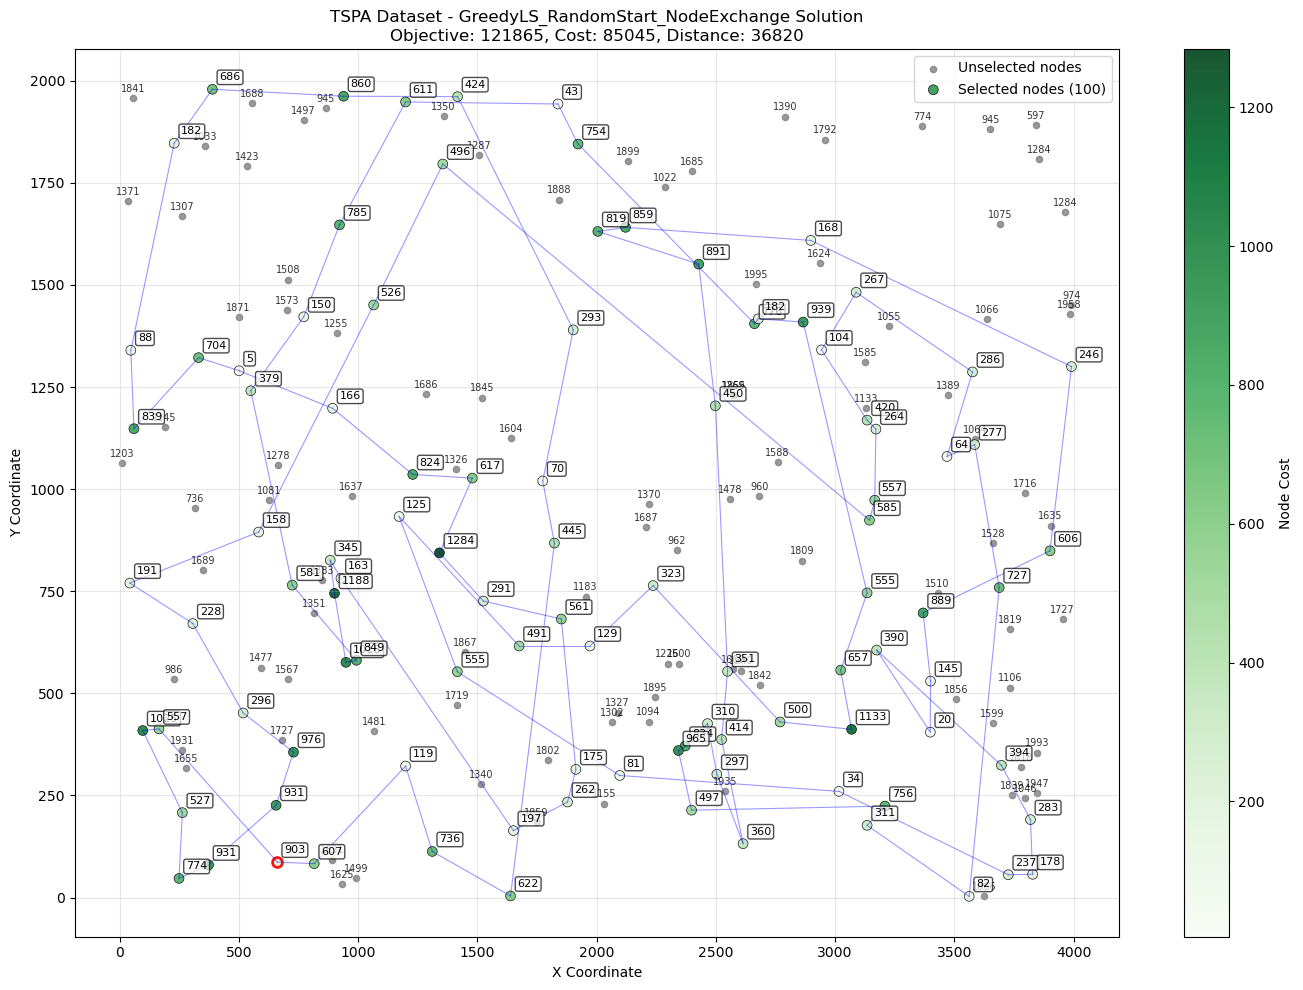

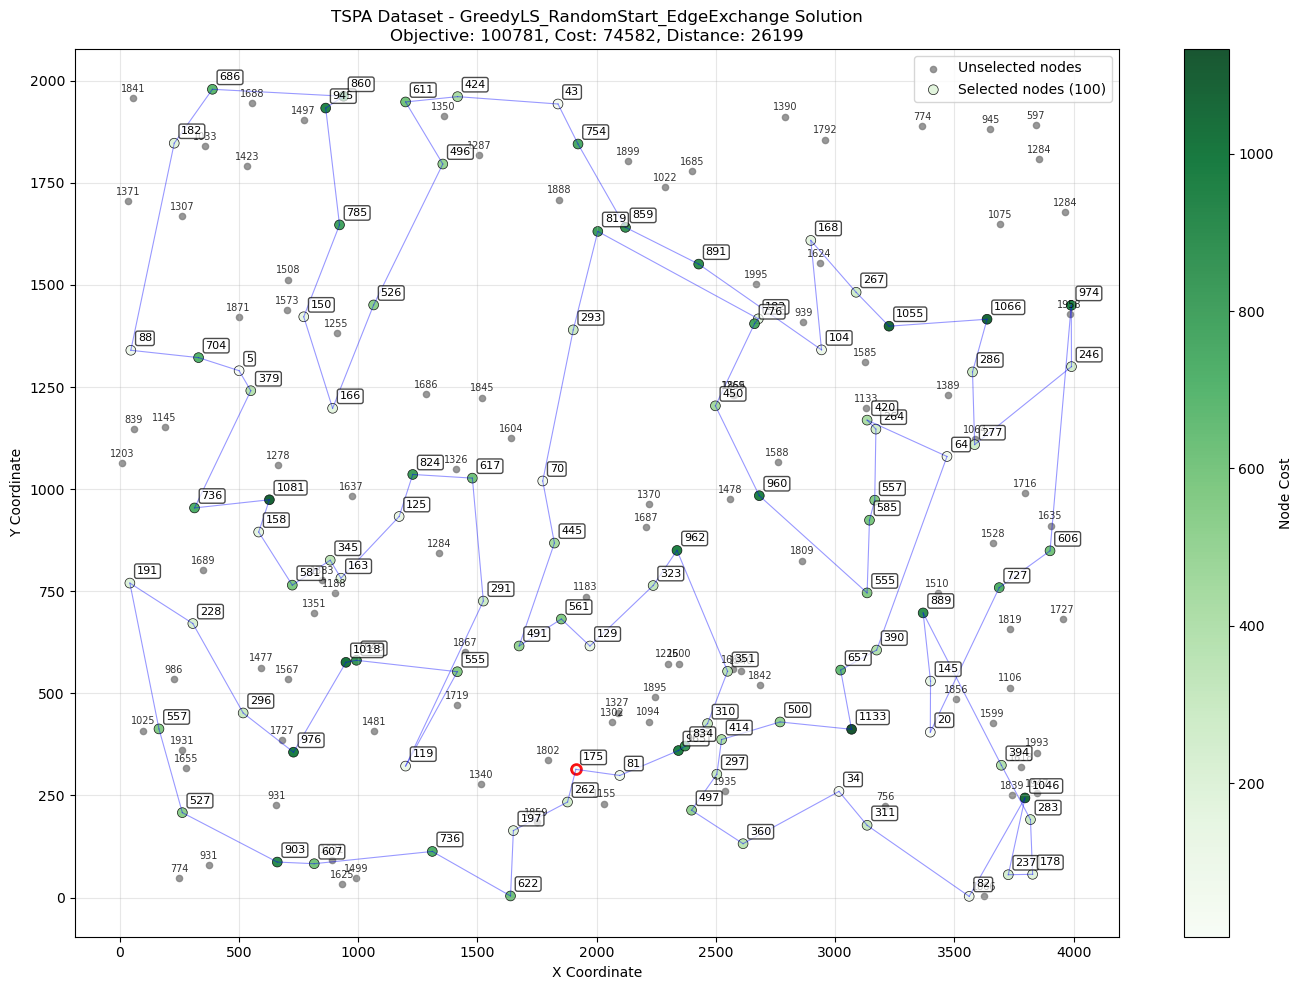

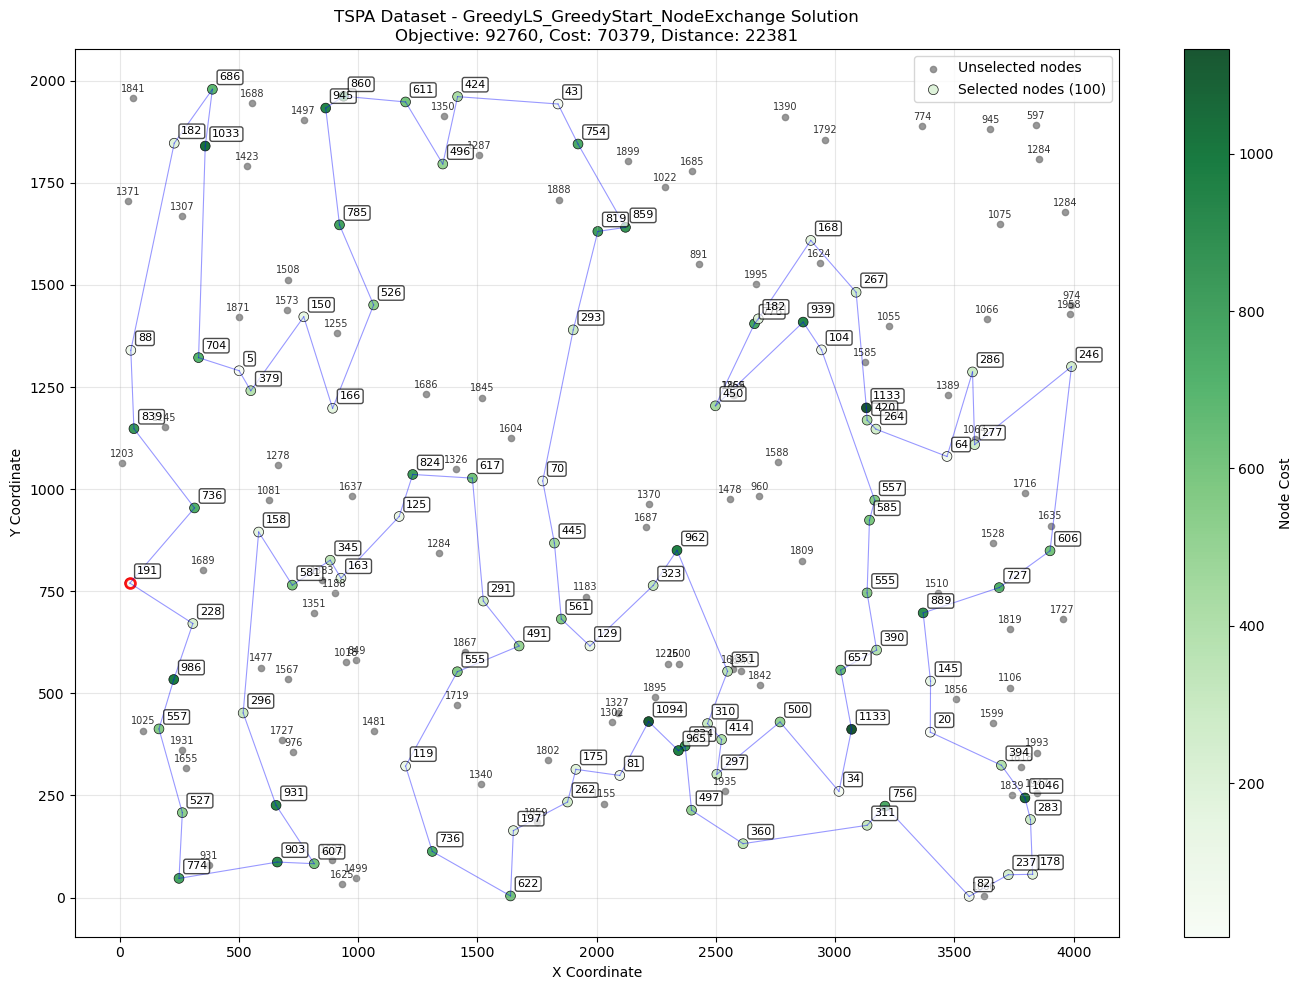

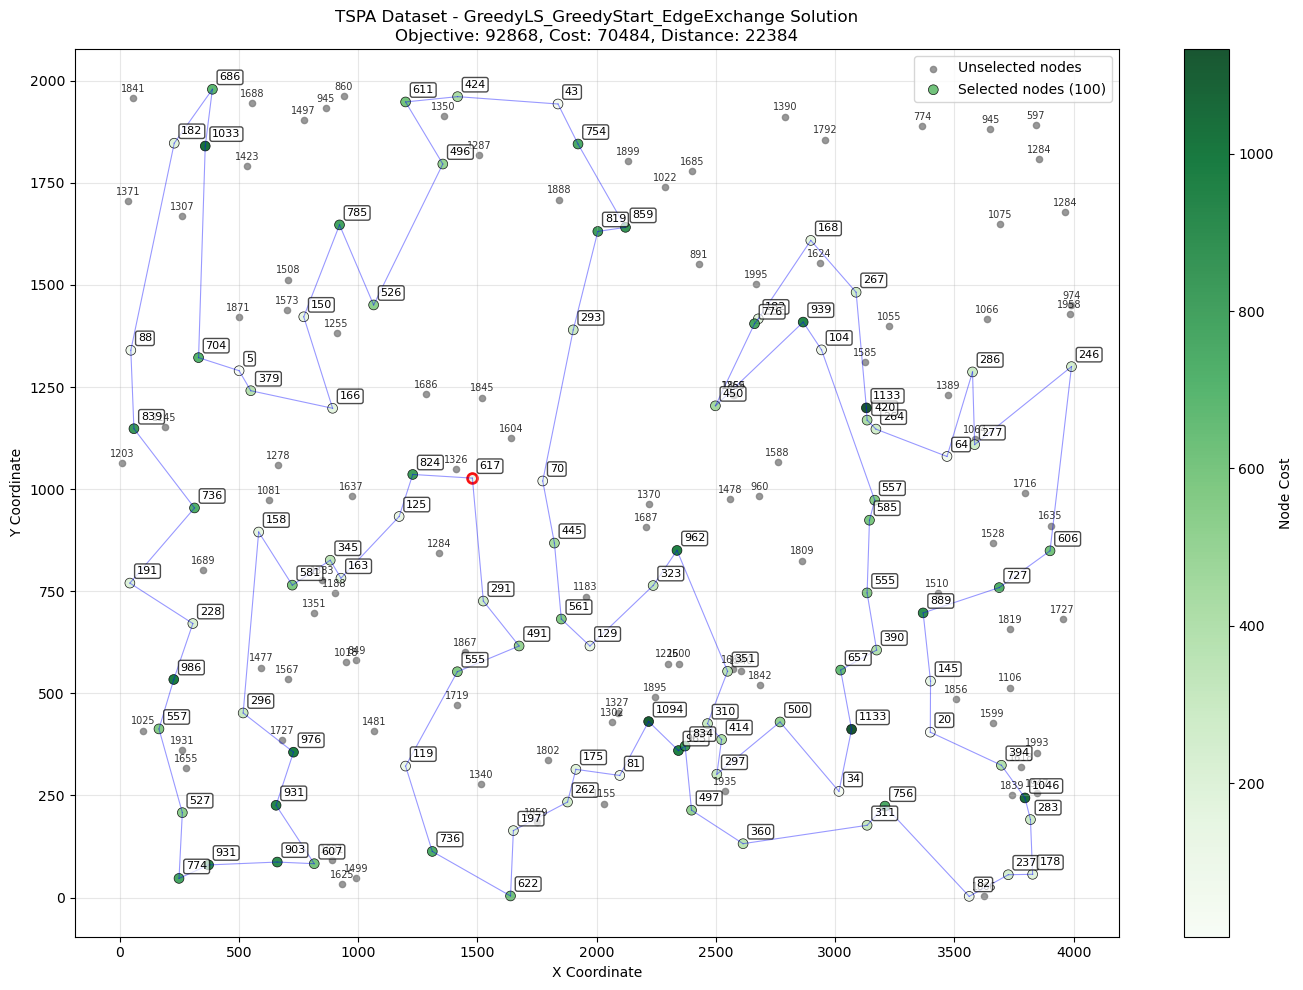

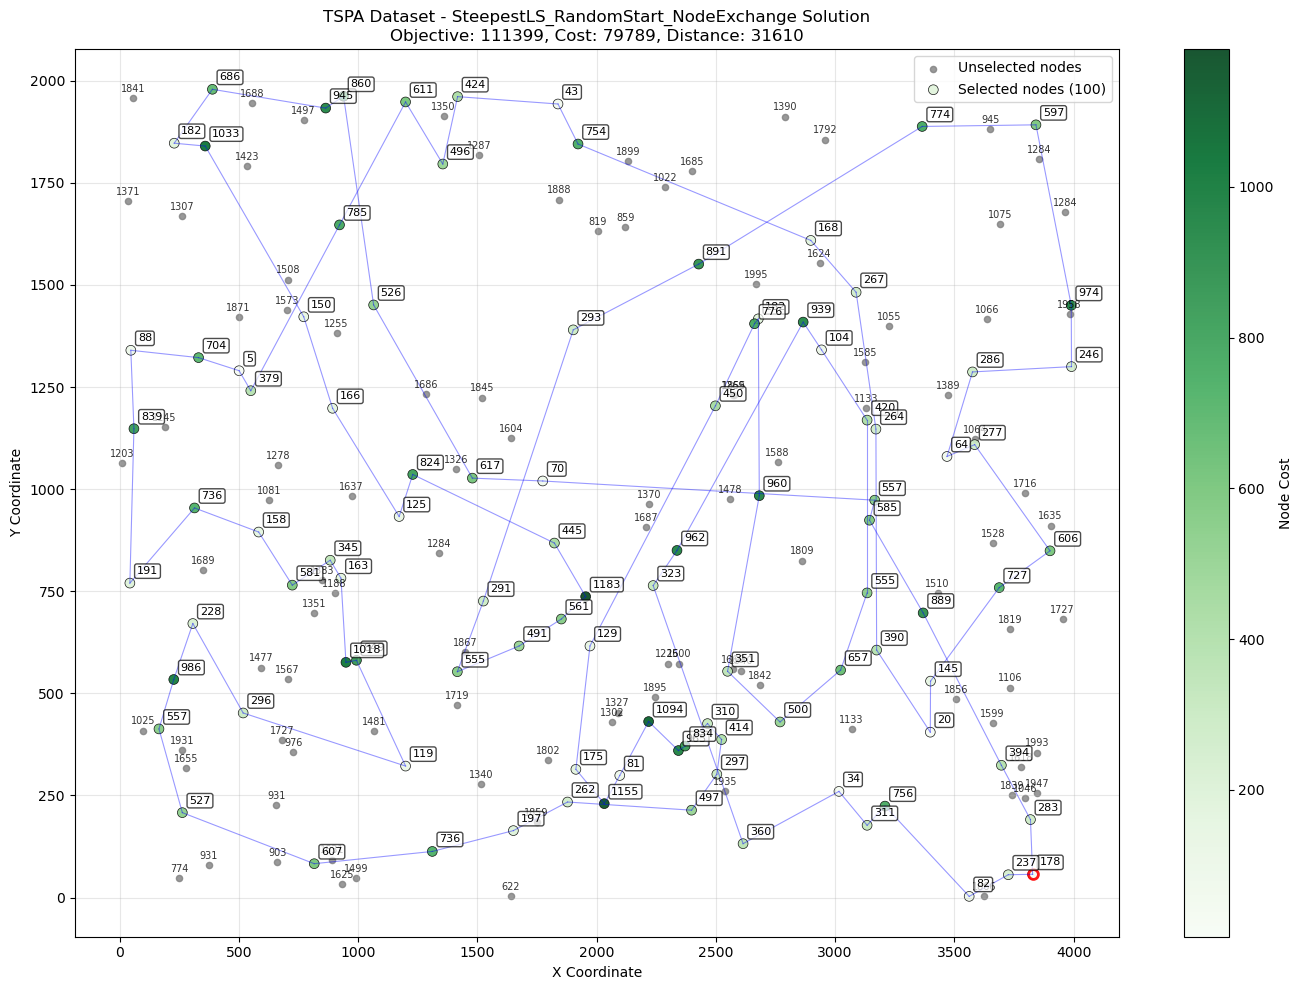

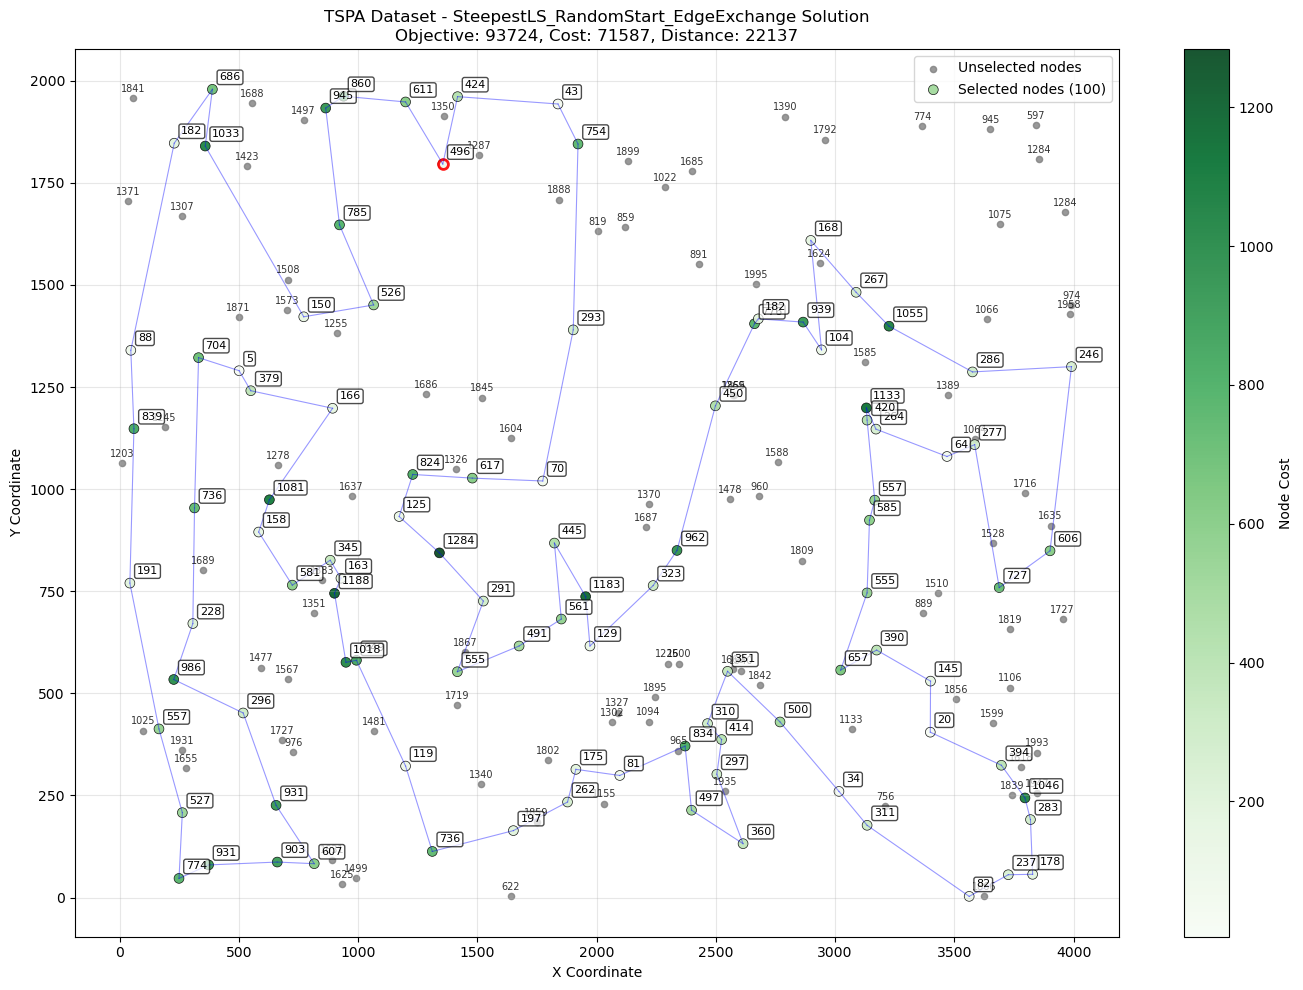

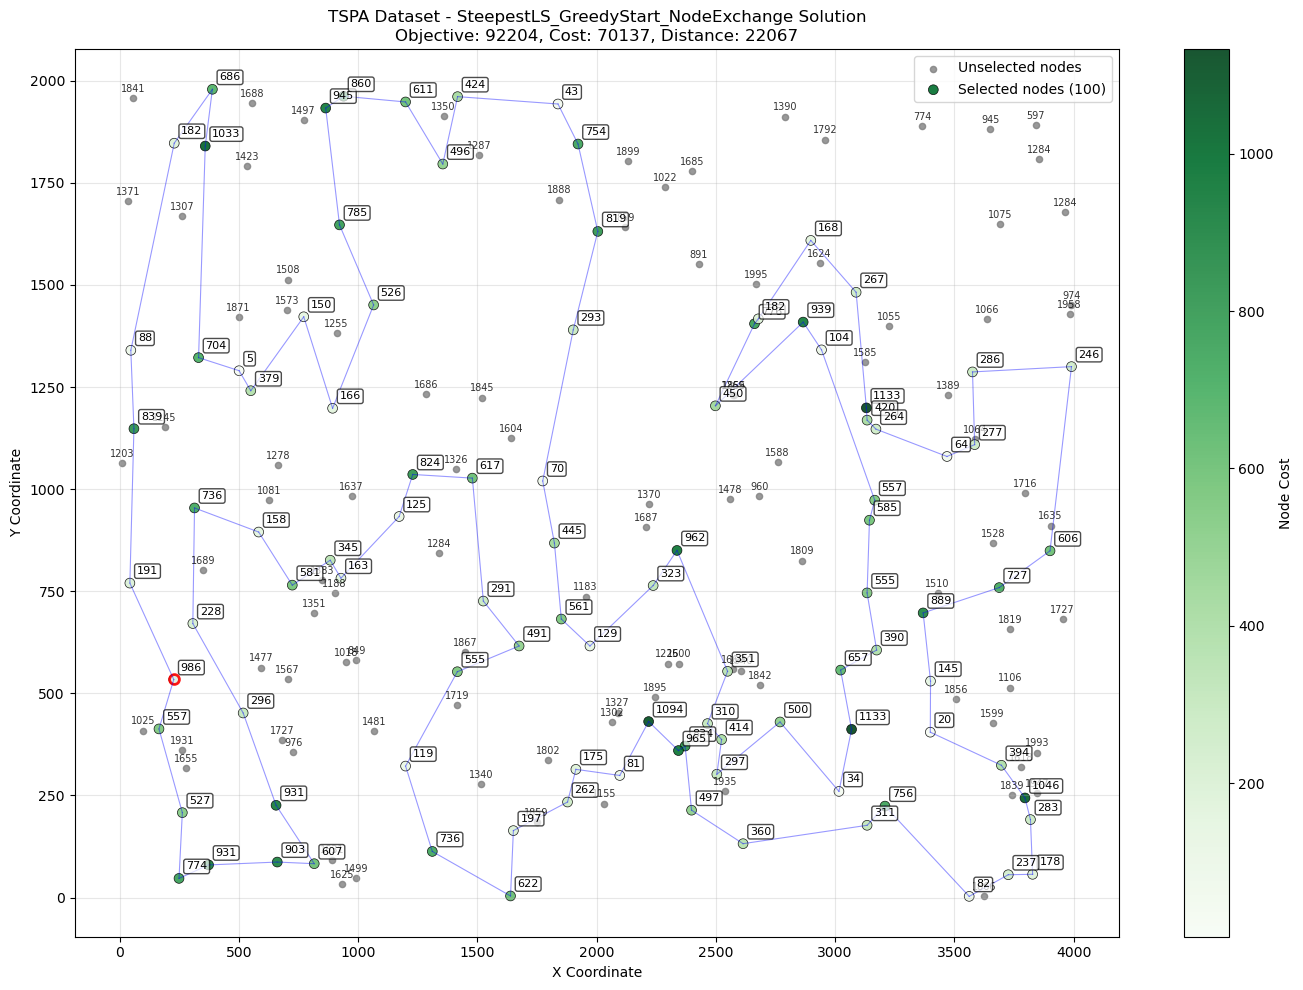

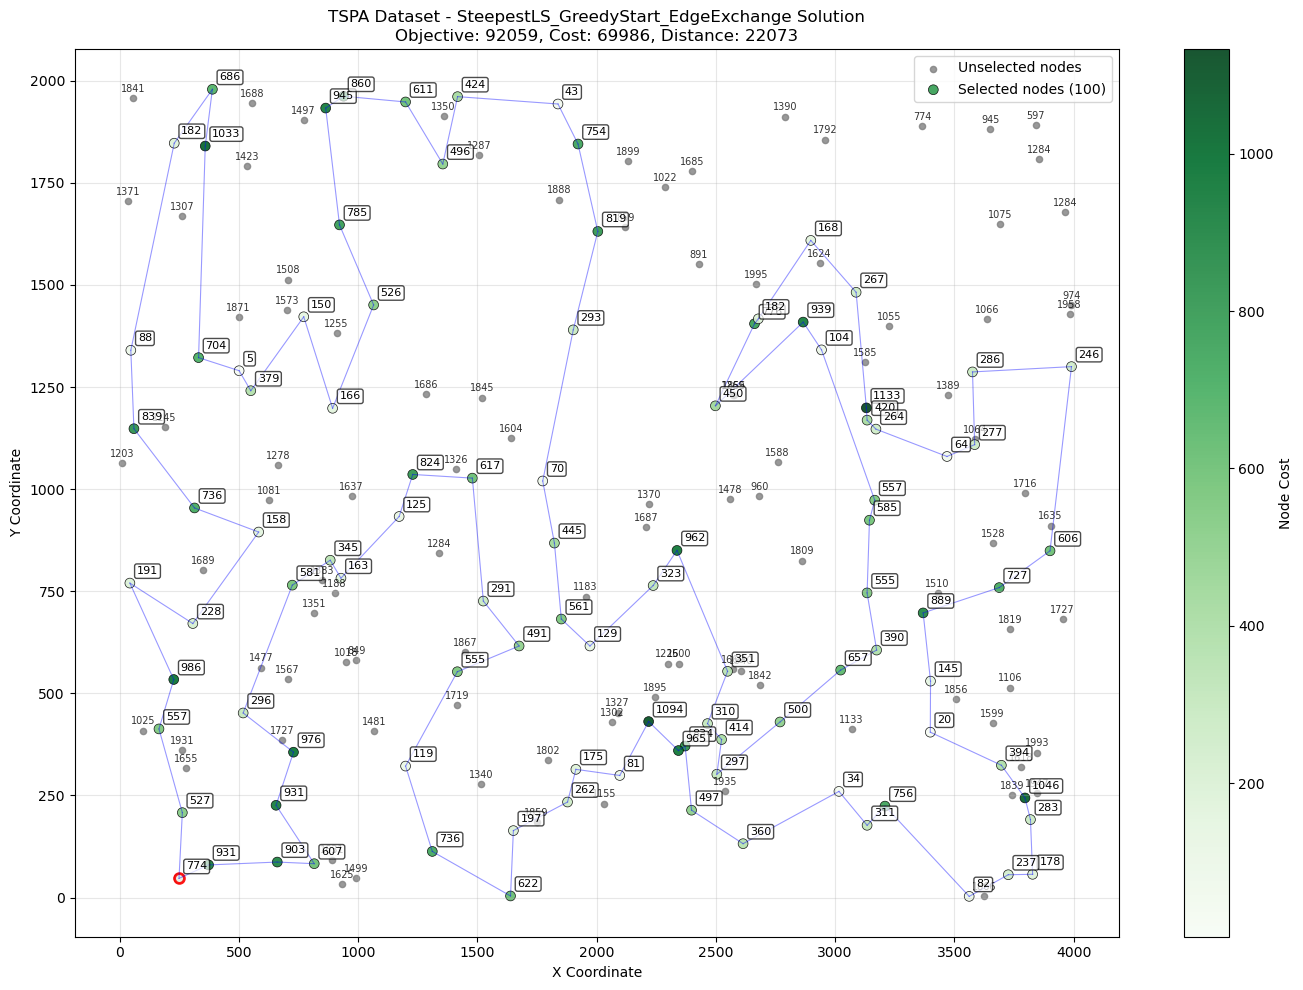

In [42]:
methods = ['GreedyLS_RandomStart_NodeExchange',
       'GreedyLS_RandomStart_EdgeExchange',
       'GreedyLS_GreedyStart_NodeExchange',
       'GreedyLS_GreedyStart_EdgeExchange',
       'SteepestLS_RandomStart_NodeExchange',
       'SteepestLS_RandomStart_EdgeExchange',
       'SteepestLS_GreedyStart_NodeExchange',
       'SteepestLS_GreedyStart_EdgeExchange']
for i, method in enumerate(methods):
    best_solution = solutions_a_final[solutions_a_final.index == i].iloc[0]
    plot_solution('TSPA', method, best_solution)

# Instance B

In [20]:
experiment_summary_b_local_search = pd.read_csv("../Results/LocalSearch/TSPB/experiment_summary.csv")


In [21]:
experiment_summary_b_local_search


Instance                               Method  MinCost  MaxCost   AvgCost  \
0     TSPB    GreedyLS_RandomStart_NodeExchange    57233    72381  64808.90   
1     TSPB    GreedyLS_RandomStart_EdgeExchange    48019    55971  51576.83   
2     TSPB    GreedyLS_GreedyStart_NodeExchange    47460    52997  50045.73   
3     TSPB    GreedyLS_GreedyStart_EdgeExchange    47140    52807  49901.09   
4     TSPB  SteepestLS_RandomStart_NodeExchange    55969    71020  62995.08   
5     TSPB  SteepestLS_RandomStart_EdgeExchange    45719    51098  48372.30   
6     TSPB  SteepestLS_GreedyStart_NodeExchange    46958    52730  49844.92   
7     TSPB  SteepestLS_GreedyStart_EdgeExchange    46904    51560  48975.24   

   MinTime  MaxTime  AvgTime  NumSolutions  BestSolutionID  
0        8       96    18.02           200             189  
1        7       31    15.25           200             166  
2        4       33     6.19           200              43  
3        4       14     5.91           200               5  
4      183      425   266.45           200             125  
5      176      376   228.37           200              69  
6        0       39    19.35           200               2  
7        0       59    24.10           200             145

In [22]:
solutions_B_greedy = pd.DataFrame()
greedy_methods = experiment_summary_b_local_search[experiment_summary_b_local_search['Method'].str.contains('GreedyLS')]

for method in greedy_methods['Method']:
    best_solution_id = experiment_summary_b_local_search['BestSolutionID'][experiment_summary_b_local_search['Method'] == method].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_greedy("TSPB", best_solution_id, method)
    solutions_B_greedy = pd.concat([solutions_B_greedy, solution], ignore_index=True)

solutions_B_greedy

GreedyLS_RandomStart_NodeExchange: Best Solution ID = 189
GreedyLS_RandomStart_EdgeExchange: Best Solution ID = 166
GreedyLS_GreedyStart_NodeExchange: Best Solution ID = 43
GreedyLS_GreedyStart_EdgeExchange: Best Solution ID = 5


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0         189      57233       100          31596              88829   
1         166      48019       100          21577              69596   
2          43      47460       100          20993              68453   
3           5      47140       100          20673              67813   

   TotalRunningTime                                              Cycle  
0                18  125-121-117-193-31-54-73-175-78-5-177-87-58-82...  
1                11  62-128-124-106-159-143-111-8-104-144-160-29-10...  
2                 5  137-127-89-103-163-187-153-81-77-141-91-61-36-...  
3                 6  137-127-89-103-163-187-153-81-77-141-91-61-36-...

In [23]:
solutions_B_steepest = pd.DataFrame()
steepest_methods = experiment_summary_b_local_search[experiment_summary_b_local_search['Method'].str.contains('SteepestLS')]
for method in steepest_methods['Method'].unique():
    method_data = experiment_summary_b_local_search[experiment_summary_b_local_search['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution_greedy("TSPB", best_solution_id, method)
    solutions_B_steepest = pd.concat([solutions_B_steepest, solution], ignore_index=True)

solutions_B_steepest

SteepestLS_RandomStart_NodeExchange: Best Solution ID = 125
SteepestLS_RandomStart_EdgeExchange: Best Solution ID = 69
SteepestLS_GreedyStart_NodeExchange: Best Solution ID = 2
SteepestLS_GreedyStart_EdgeExchange: Best Solution ID = 145


SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0         125      55969       100          29217              85186   
1          69      45719       100          20373              66092   
2           2      46958       100          20078              67036   
3         145      46904       100          20388              67292   

   TotalRunningTime                                              Cycle  
0               277  143-159-187-146-97-141-77-81-153-163-103-113-1...  
1               208  124-106-143-35-109-0-29-160-33-138-182-11-139-...  
2                21  187-153-81-77-141-91-61-36-78-175-142-45-5-177...  
3                25  166-194-176-113-26-103-114-137-127-89-163-187-...

In [24]:
solutions_b_final = pd.concat([solutions_B_greedy, solutions_B_steepest], ignore_index=True) 
solutions_b_final

SolutionID  TotalCost  NumNodes  TotalDistance  ObjectiveFunction  \
0         189      57233       100          31596              88829   
1         166      48019       100          21577              69596   
2          43      47460       100          20993              68453   
3           5      47140       100          20673              67813   
4         125      55969       100          29217              85186   
5          69      45719       100          20373              66092   
6           2      46958       100          20078              67036   
7         145      46904       100          20388              67292   

   TotalRunningTime                                              Cycle  
0                18  125-121-117-193-31-54-73-175-78-5-177-87-58-82...  
1                11  62-128-124-106-159-143-111-8-104-144-160-29-10...  
2                 5  137-127-89-103-163-187-153-81-77-141-91-61-36-...  
3                 6  137-127-89-103-163-187-153-81-77-141-91-61-36-...  
4               277  143-159-187-146-97-141-77-81-153-163-103-113-1...  
5               208  124-106-143-35-109-0-29-160-33-138-182-11-139-...  
6                21  187-153-81-77-141-91-61-36-78-175-142-45-5-177...  
7                25  166-194-176-113-26-103-114-137-127-89-163-187-...

In [25]:
coords = tspb_raw_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)

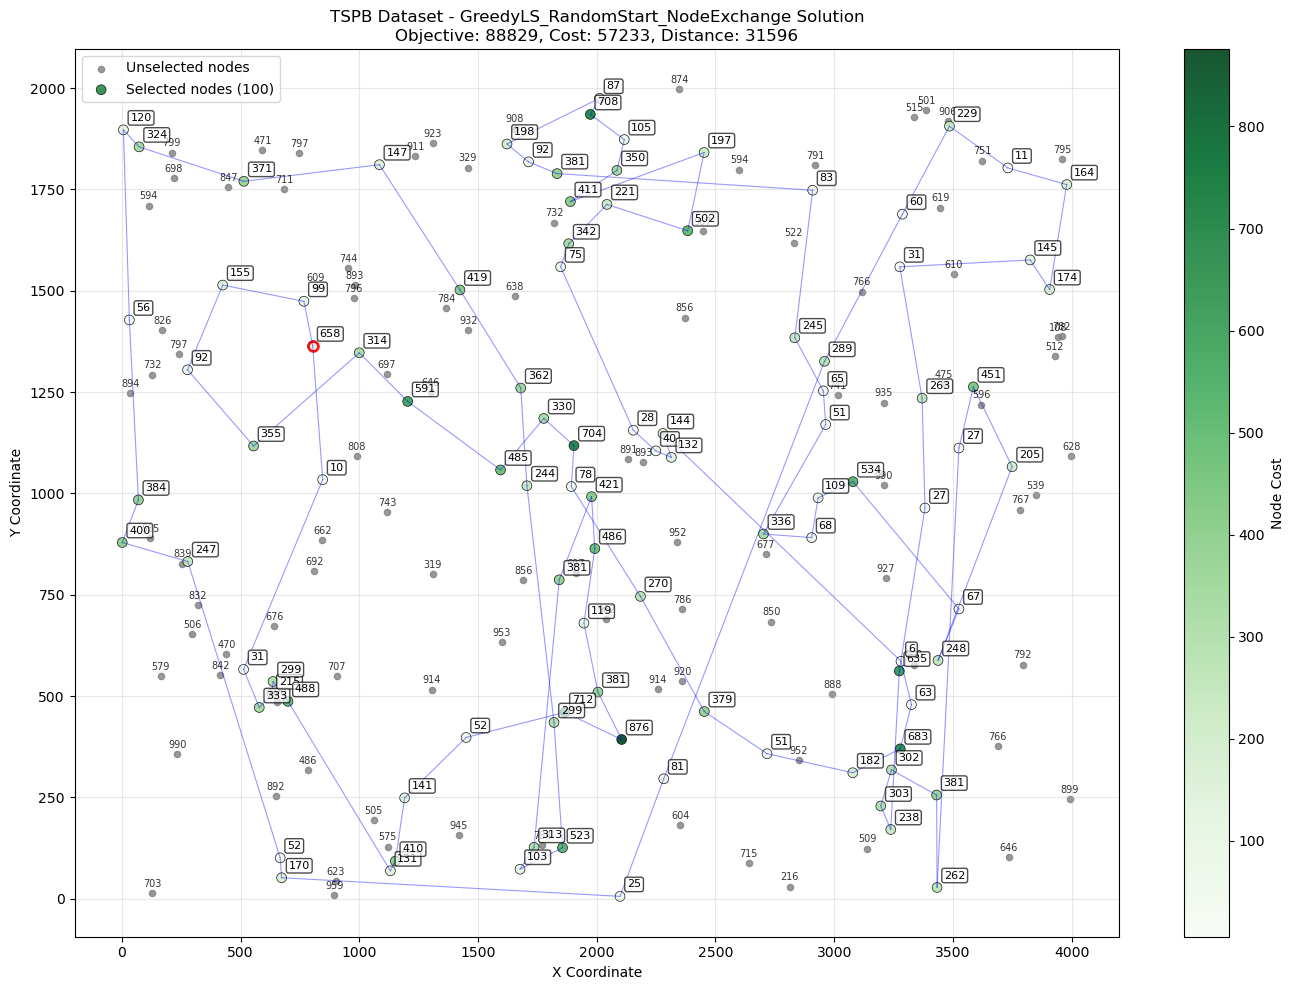

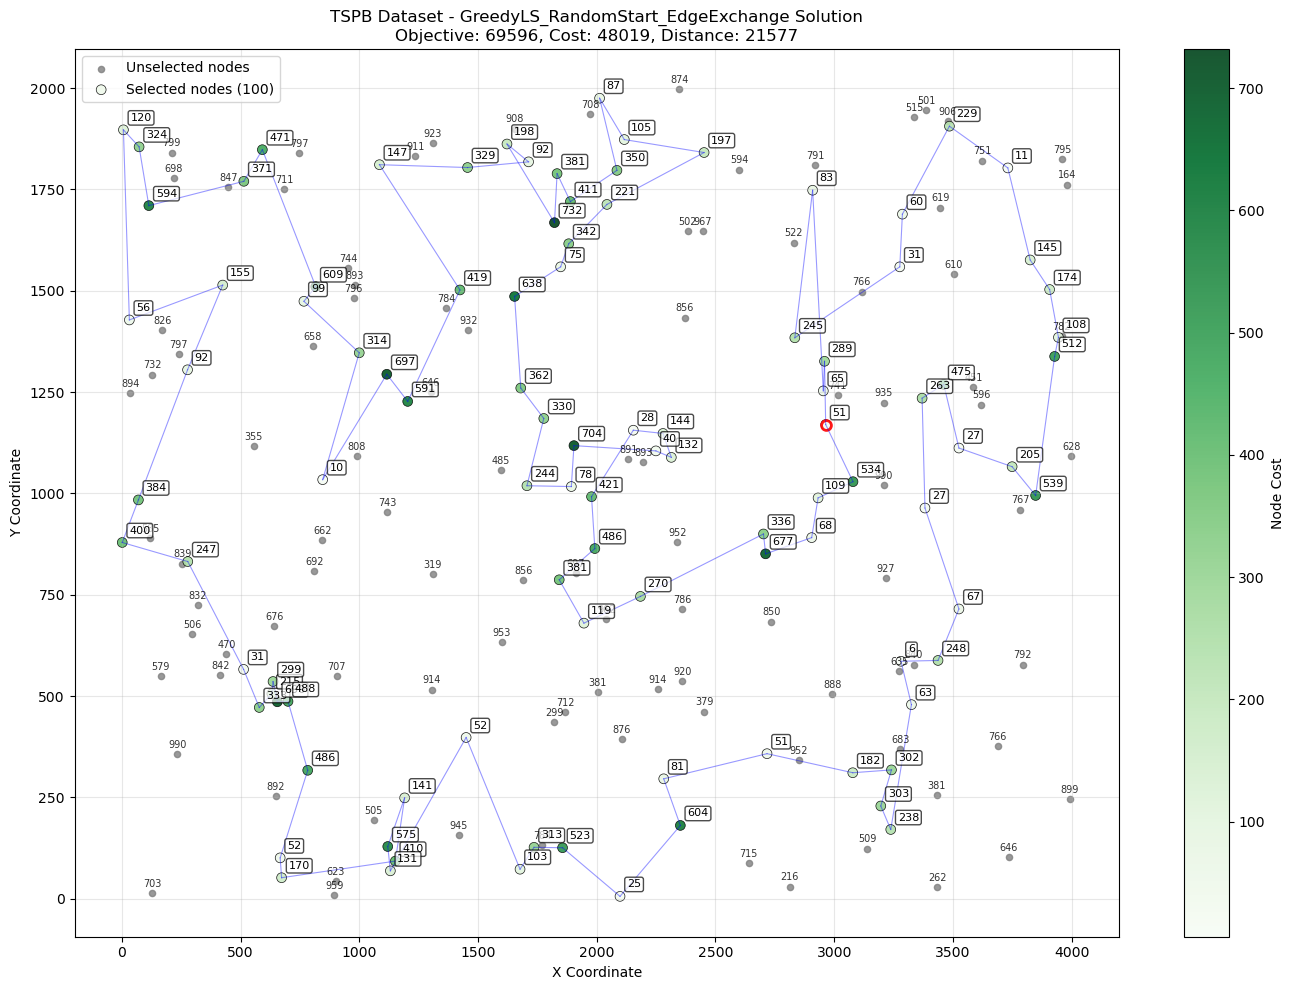

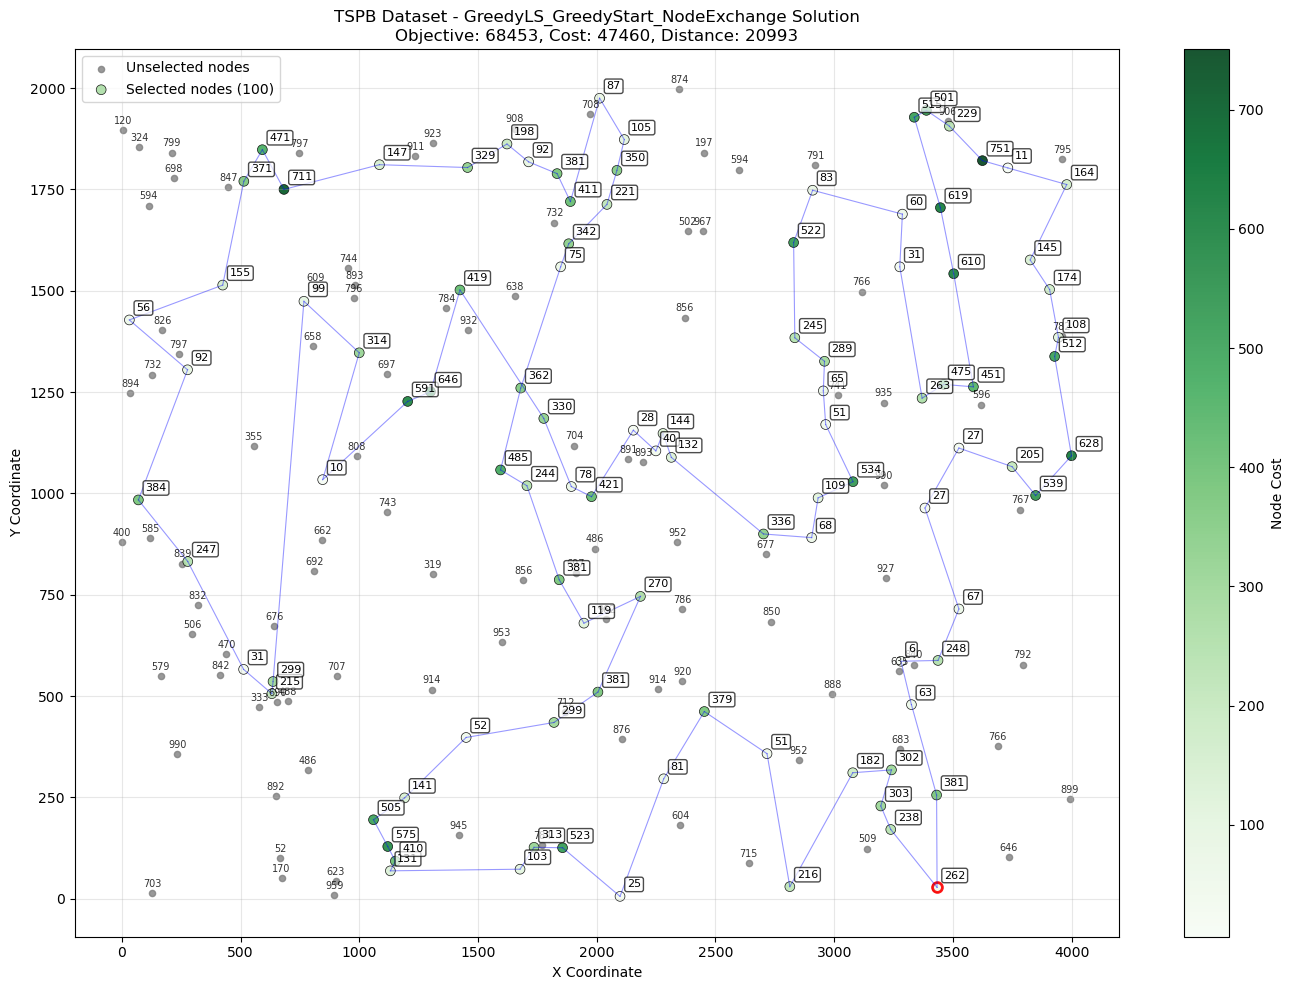

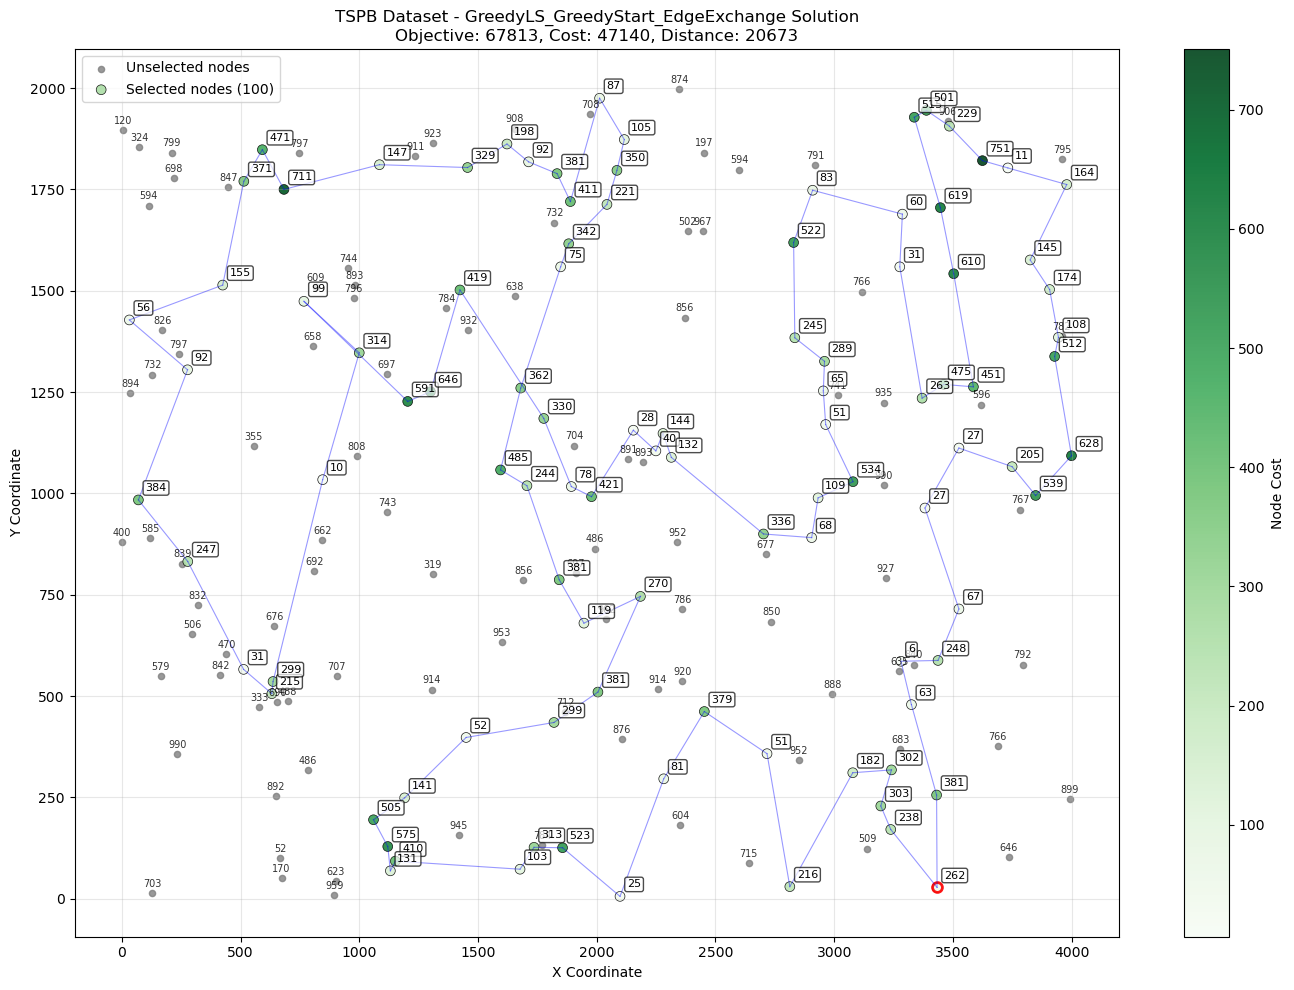

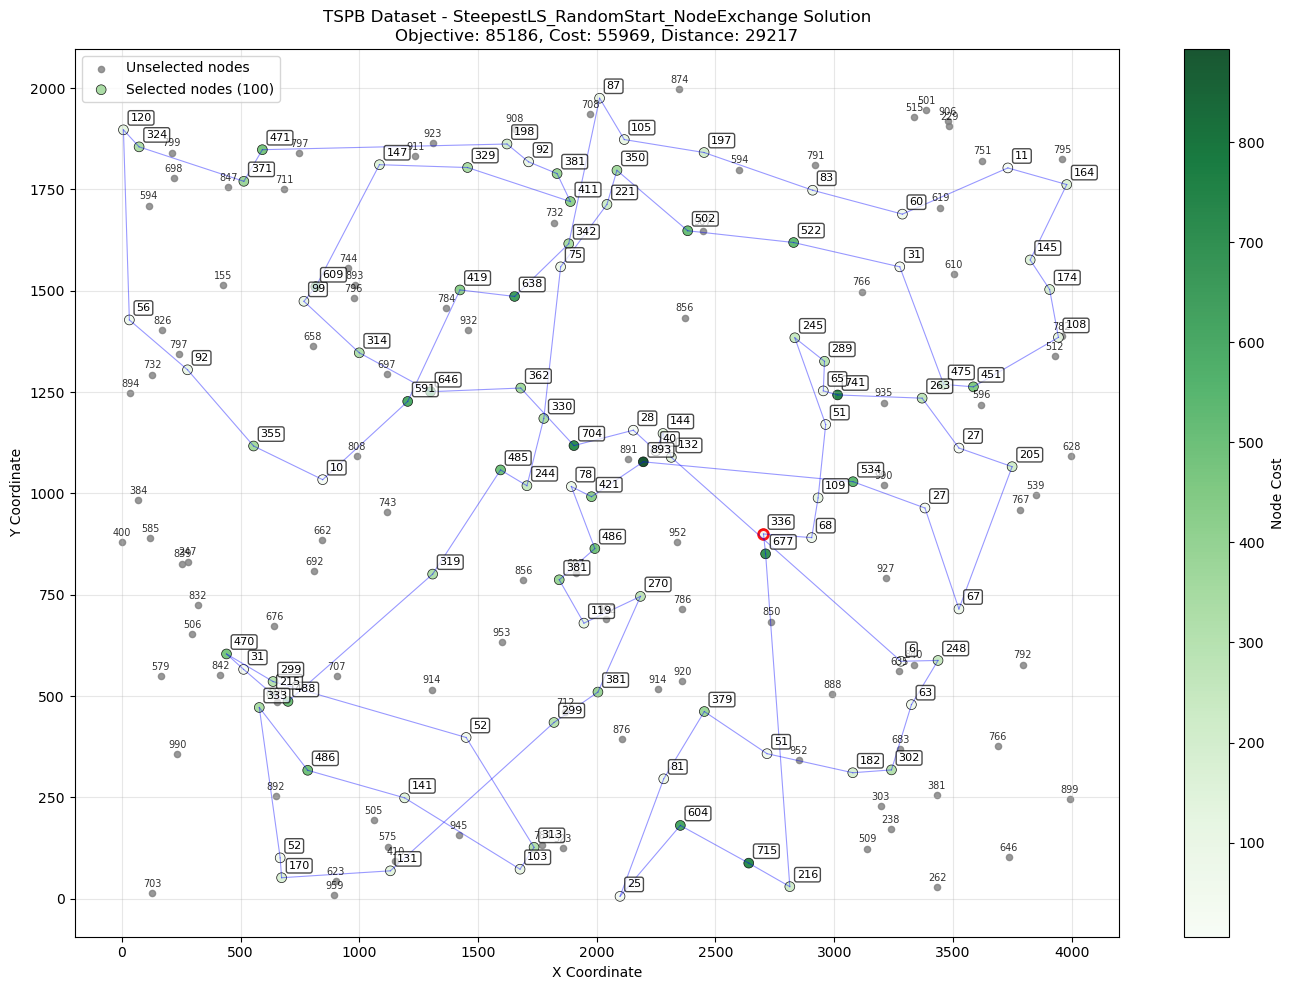

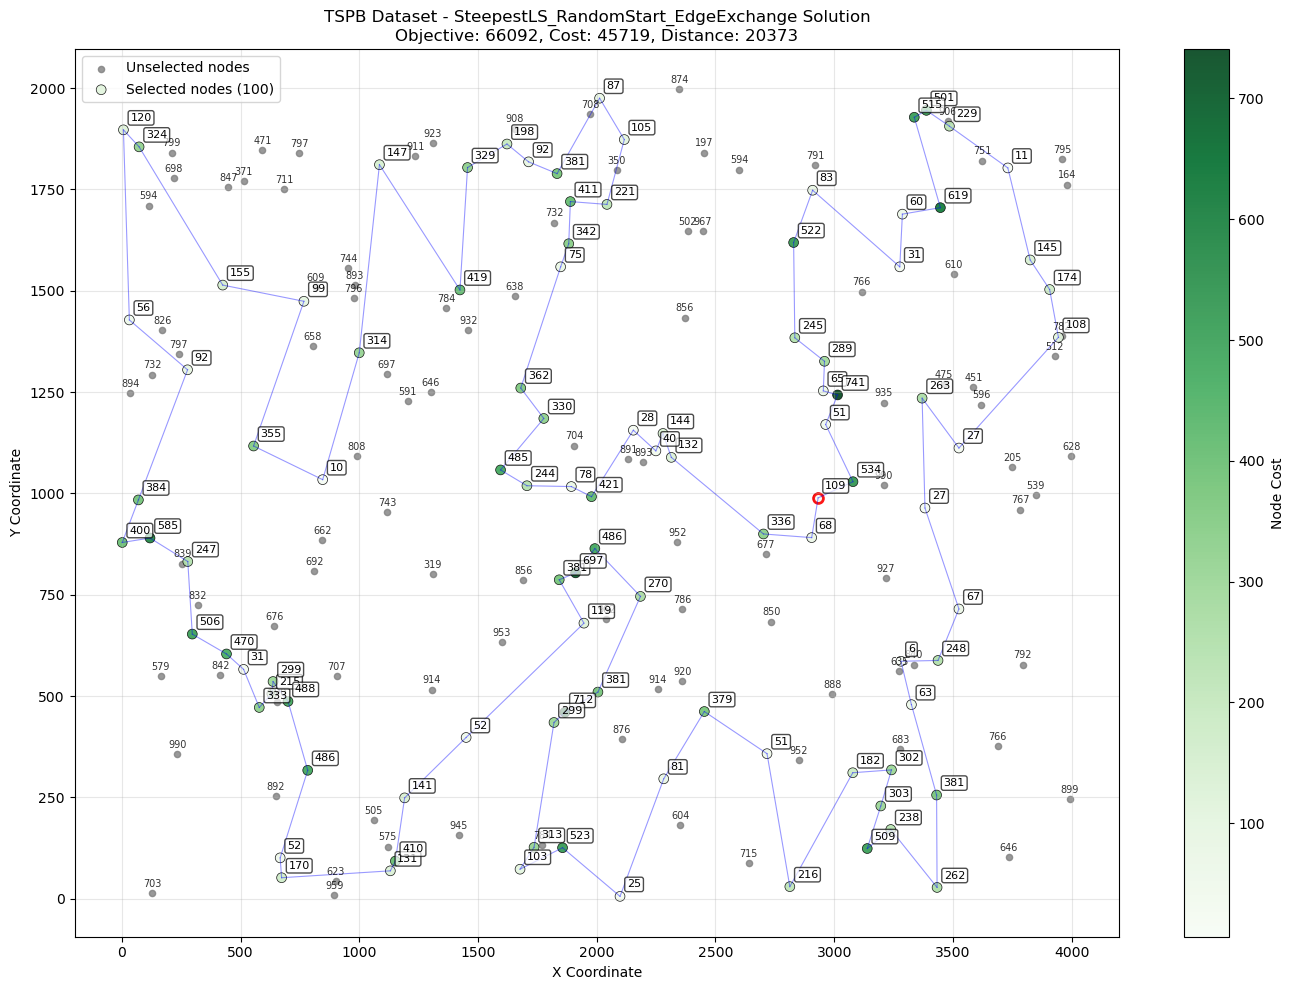

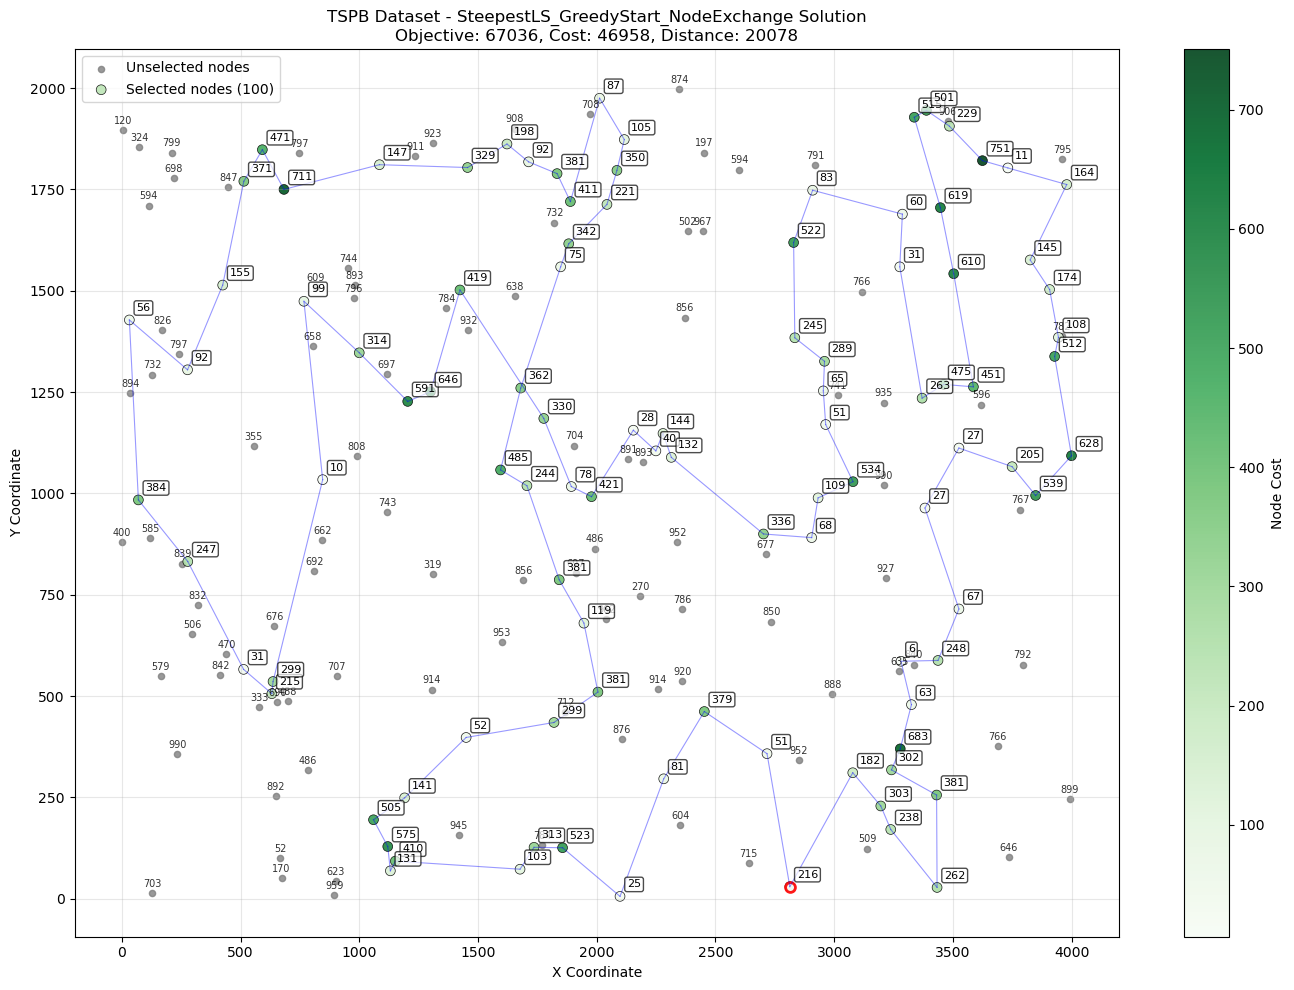

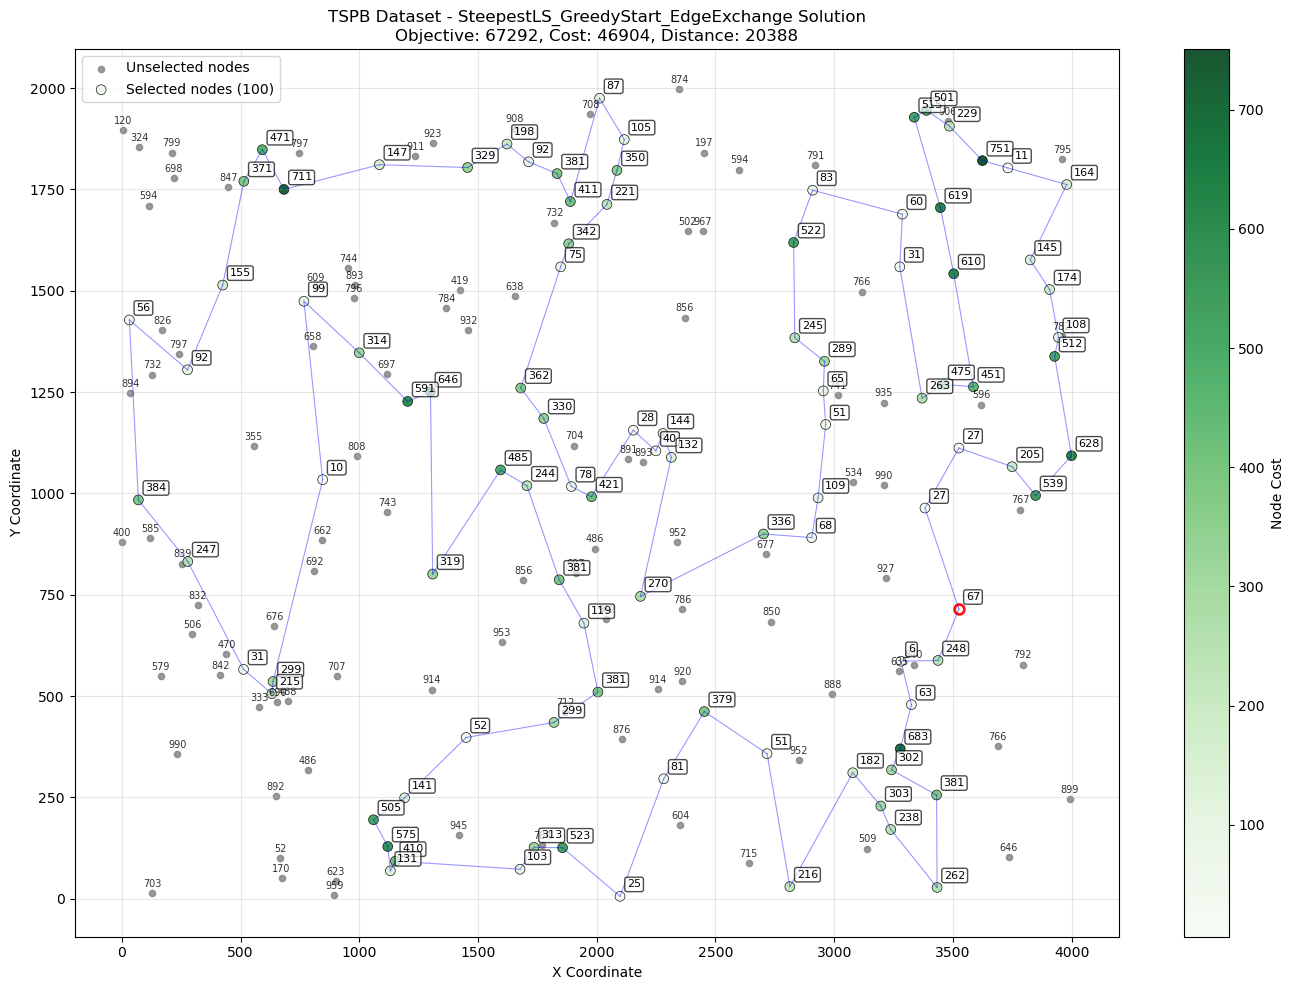

In [43]:
methods = ['GreedyLS_RandomStart_NodeExchange',
       'GreedyLS_RandomStart_EdgeExchange',
       'GreedyLS_GreedyStart_NodeExchange',
       'GreedyLS_GreedyStart_EdgeExchange',
       'SteepestLS_RandomStart_NodeExchange',
       'SteepestLS_RandomStart_EdgeExchange',
       'SteepestLS_GreedyStart_NodeExchange',
       'SteepestLS_GreedyStart_EdgeExchange']
for i, method in enumerate(methods):
    best_solution = solutions_b_final[solutions_b_final.index == i].iloc[0]
    plot_solution('TSPB', method, best_solution)

In [45]:
# Create enhanced comparison table for both instances
comparison_data = []

# Add Instance A data
for i, method in enumerate(methods):
    solution_a = solutions_a_final.iloc[i]
    summary_a = experiment_summary_a_local_search[experiment_summary_a_local_search['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPA',
        'Method': method,
        'ObjectiveFunction': solution_a['ObjectiveFunction'],
        'TotalDistance': solution_a['TotalDistance'],
        'TotalCost': solution_a['TotalCost'],
        'MinCost': summary_a['MinCost'],
        'MaxCost': summary_a['MaxCost'],
        'AvgCost': summary_a['AvgCost']
    })

# Add Instance B data
for i, method in enumerate(methods):
    solution_b = solutions_b_final.iloc[i]
    summary_b = experiment_summary_b_local_search[experiment_summary_b_local_search['Method'] == method].iloc[0]
    comparison_data.append({
        'Instance': 'TSPB',
        'Method': method,
        'ObjectiveFunction': solution_b['ObjectiveFunction'],
        'TotalDistance': solution_b['TotalDistance'],
        'TotalCost': solution_b['TotalCost'],
        'MinCost': summary_b['MinCost'],
        'MaxCost': summary_b['MaxCost'],
        'AvgCost': summary_b['AvgCost']
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Create a fancy formatted table
print("=" * 120)
print(f"{'TSP ALGORITHM PERFORMANCE COMPARISON':^120}")
print("=" * 120)

for instance in ['TSPA', 'TSPB']:
    instance_data = comparison_df[comparison_df['Instance'] == instance]
    print(f"\n{f'INSTANCE {instance}':^120}")
    print("-" * 120)
    print(f"{'Method':<25} {'Best Obj':<12} {'Best Dist':<12} {'Best Cost':<12} {'Min Cost':<12} {'Max Cost':<12} {'Avg Cost':<12}")
    print("-" * 120)
    
    for _, row in instance_data.iterrows():
        print(f"{row['Method']:<25} {row['ObjectiveFunction']:<12} {row['TotalDistance']:<12} {row['TotalCost']:<12} "
              f"{row['MinCost']:<12} {row['MaxCost']:<12} {row['AvgCost']:<12.2f}")
    
    print("-" * 120)

print("\n" + "=" * 120)

                                          TSP ALGORITHM PERFORMANCE COMPARISON                                          

                                                     INSTANCE TSPA                                                      
------------------------------------------------------------------------------------------------------------------------
Method                    Best Obj     Best Dist    Best Cost    Min Cost     Max Cost     Avg Cost    
------------------------------------------------------------------------------------------------------------------------
GreedyLS_RandomStart_NodeExchange 121865       36820        85045        85045        103817       93245.75    
GreedyLS_RandomStart_EdgeExchange 100781       26199        74582        74582        86199        78703.19    
GreedyLS_GreedyStart_NodeExchange 92760        22381        70379        70379        72931        71684.54    
GreedyLS_GreedyStart_EdgeExchange 92868        22384        70484        70